# 03_Classification_performance

In the previous tutorials, we've seen machine learning takes the problem form:

>`Given`
>- x1, x2, x3... (features)  
>- y (target)  

>`Our wish`
>- Find a good rule/profiler (or "function") that help us predict target, given the features

From now on, we would discover one of the the most fundamental task in machine learning: classification.

**WARING: This tutorial is focusing on concepts. I strongly recommend you raise any question you have in this section.**

# What is classification?

X = categorical or numerical
Y = "group" or "class" membership of record

For a function that help us predict y(target) given x1,x2, x3...(features), we usually call it a **classifier**

- Goal: To explain or to predict?
    - Profiling (=Explaining): What factors (X1, X2,...) affect customer satisfaction (Y)?
        - Purpose: Retention strategies, Acquisition strategies, Policy changes
        - Data: Customer demographics, Info on Customer calls, Billing history
    - Classification (=Prediction):Predict Y (class) for new records, based on their feature information (X1, X2,...)  
    `can you think of a predictive goal for the predictive example using the same data?`
    - Ranking: a special predictive goal, will discuss later

# Classification performance for binary classification task

Binary classification is the basic case in classification problem. The target in binary classification problem could be "Yes/No", "High/Low", "Churn/Stay"...etc

Let's see an example!

Suppose we have a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict **whether or not they will click on an ad** based off the features of that user.

Here's the data dictionary
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
data = pd.read_csv("./advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Hold on a second...**  
Why do we want to create a model to predict whther they click on Ad or not?  To explain or to predict?  
And how it matters to our modeling process?  

In [2]:
print(data['Timestamp'].min())
print(data['Timestamp'].max())

2016-01-01 02:52:10
2016-07-24 00:22:16


Hint:
- To explain -> build model on whole data, or train test split randomly
- To predict -> think of train test split and split on what carefully

-----> Always think with the goal carefully  
Let's move on!

## Baseline Performance
Why do we need a baseline?
### Baseline#1: The naive rule - Classify each observation as belonging to the majority class
- Naïve rule applied to training, holdout or combined?
- What is the naïve rule in the case of a numerical output?

In [3]:
train = data.iloc[:800]
test = data.iloc[800:]
#what is the baseline?
#print(data['Clicked on Ad'].value_counts())
print(test['Clicked on Ad'].value_counts())

1    112
0     88
Name: Clicked on Ad, dtype: int64


### Baseline#2: Same past value
- What if same Xs and they have differnt Y?
- What if there is unseen sample in new data?

## Interpreting the classification result

In [4]:
non_num_cols = ['Ad Topic Line','Country','City','Male','Timestamp','Clicked on Ad']
X_train = train.drop(non_num_cols,axis='columns')
X_test = test.drop(non_num_cols,axis='columns')
y_train = train['Clicked on Ad']
y_test = test['Clicked on Ad']
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

How could we evaluate this prediction performance?

In [5]:
result = pd.concat([y_test.reset_index(drop = True),pd.Series(y_pred).rename('prediction')],axis = 'columns')
result

,Clicked on Ad,prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
195,1,0
196,1,1
197,1,1
198,0,0


In [6]:
print("accuracy = %s"%str(sum(result['Clicked on Ad']==result['prediction'])/len(result)))

accuracy = 0.92


### The "confusion matrix"

In [7]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),index=['actual_0','acutal_1'],columns = ['pred_0','pred_1'])

,pred_0,pred_1
actual_0,85,3
acutal_1,13,99


### Common classification performance metrics derived from confusion matrix

#### `accuracy` = $\frac{correct}{all} = \frac{(predict\ true\ and\ actuall\ true) +(predict\ false\ and\ actual\ false) }{all} = \frac{85+99}{85+3+13+99} = 0.92$  
#### `precision` = $\frac{actual\ true\ and\ predict\ true}{predict true} = \frac{99}{3+99}$  
#### `recall` = $\frac{actual\ true\ and\ predict\ true}{actual\ true} = \frac{99}{13+99}$  
To consider both precision and recall in one place, we could use F1 score
#### `F1 socre` = $\frac{1}{\frac{1}{precision}\ \ \ +\  \frac{1}{recall}}$

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.97      0.88      0.93       112

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200



----
### `The cut off value/threshold`  
If we were asked to manually make prediction. From time to time there will be some samples not so easy to make prediction on. 

<div>
<img src="./dogvsfired.jpg" width="400"/><img src="./dogvsbread.jpg" width="400"/>
</div>

Also for some context we want to make bold prediction(e.g. marketing) and sometimes we would rather be conservative(e.g. predicting crime). 

- Can we adjust our classifier to make bolder/more conservative prediction?  
---->For most classification methos, they actually produce **probabilities/possibility for each class**. Later they assign label on **cutoff** values.

In [9]:
# These are the prediction results from our classifer, use 0.5 as cutoff value 
pred_proba = pd.DataFrame(clf.predict_proba(X_test),columns = ['pred_0_prob','pred_1_prob'])
test_merged = pd.concat([X_test.reset_index(drop = True),pred_proba,pd.Series(y_pred).rename('prediction')],axis = 'columns')
print(pd.Series(y_pred).value_counts())
test_merged.head()

1    102
0     98
dtype: int64


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,pred_0_prob,pred_1_prob,prediction
0,56.64,29,55984.89,123.24,0.444672,0.555328,1
1,53.33,34,44275.13,111.63,0.094598,0.905402,1
2,50.63,50,25767.16,142.23,0.001990,0.998010,1
3,41.84,49,37605.11,139.32,0.001934,0.998066,1
4,53.92,41,25739.09,125.46,0.016152,0.983848,1


Now, we change the threshold 

In [10]:
threshold = 0.9
conservative_y_pred = (pred_proba['pred_1_prob']>threshold).astype(int)
conservative_test_merged = pd.concat([X_test.reset_index(drop = True),pred_proba,pd.Series(conservative_y_pred).rename('prediction')],axis = 'columns')
print(pd.Series(conservative_y_pred).value_counts())
conservative_test_merged.head()

0    126
1     74
Name: pred_1_prob, dtype: int64


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,pred_0_prob,pred_1_prob,prediction
0,56.64,29,55984.89,123.24,0.444672,0.555328,0
1,53.33,34,44275.13,111.63,0.094598,0.905402,1
2,50.63,50,25767.16,142.23,0.001990,0.998010,1
3,41.84,49,37605.11,139.32,0.001934,0.998066,1
4,53.92,41,25739.09,125.46,0.016152,0.983848,1


- How could we evaluate such classifier?

In [11]:
print(classification_report(y_test,conservative_y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        88
           1       1.00      0.66      0.80       112

    accuracy                           0.81       200
   macro avg       0.85      0.83      0.81       200
weighted avg       0.87      0.81      0.81       200



We could also try other thresholds to see which best fit your needs.

#### The "ROC curve"
- Some classifier tends to be bold, some are not. How could we compare them?
- Throughout the thresholds, we would get bunch of precisions and recalls. Can we combine them and make an overall evaluation?

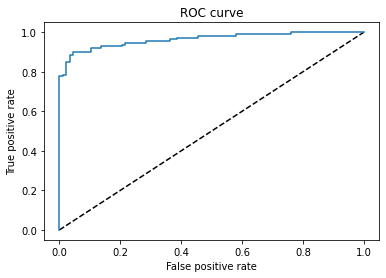

auc: 0.9643871753246753


In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, pred_proba['pred_1_prob'])
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print("auc: "+str(roc_auc_score(y_test,pred_proba['pred_1_prob'])))

# Discussion: Some topics to consider in classification performance
Congrats! We had went through the basics of performance in binary classification. You could extend these concepts to other classification problems.
- Accuracy paradox: When it is a problem(and when it isn't)?How to avoid it?
- Multiclass classification: Can you find 2 metrics/charts and explain the meaning of the metrics?
- Hierarchical classifcation: Can you find 2 metrics/charts and explain the meaning of the metrics?
- Ranking problem: Can you find 2 metrics/charts and explain the meaning of the metrics?